# MNE-practice: Event Related Potantials (ERP)

Atsuya Kobayashi 2018-10-20

---

- [ERP: **事象関連電位**](https://ja.wikipedia.org/wiki/%E4%BA%8B%E8%B1%A1%E9%96%A2%E9%80%A3%E9%9B%BB%E4%BD%8D)  

エポッキングと加算平均が主な処理。刺激呈示時をオンセットとしそこから数十ms〜数百ms後に共通した振幅の変化を言う。数百回刺激呈示を繰り返し各トライアルをオンセットから-1000ms〜数千msを切り出し1エポックとする。同一刺激条件のエポックを加算平均し，ノイズの除去を行い，共通した振幅変化の見られる部分を抽出する。事象関連電位は高次の処理、記憶、予測、注意、心理状態の変化によって発生するとされている。

![img from wikipedia](https://upload.wikimedia.org/wikipedia/commons/thumb/a/ac/ComponentsofERP.svg/440px-ComponentsofERP.svg.png)


- Reference: http://www.martinos.org/mne/stable/auto_tutorials/plot_eeg_erp.html?highlight=eeg

In [1]:
import mne
from mne.datasets import sample

`~/mne_data`直下へデータをダウンロード。

In [2]:
data_path = sample.data_path()

raw_fname = data_path + '/MEG/sample/sample_audvis_filt-0-40_raw.fif'
event_fname = data_path + '/MEG/sample/sample_audvis_filt-0-40_raw-eve.fif'

# these data already have an EEG average reference
raw = mne.io.read_raw_fif(raw_fname, preload=True)

Using default location ~/mne_data for sample...
[.................................................] 100.00% ( 1.54 GB,   2.0 MB/s) -   
Verifying hash fc2d5b9eb0a144b1d6ba84dc3b983602.
Decompressing the archive: /Users/atsuya/mne_data/MNE-sample-data-processed.tar.gz
(please be patient, this can take some time)
Successfully extracted to: ['/Users/atsuya/mne_data/MNE-sample-data']
Opening raw data file /Users/atsuya/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.
Current compensation grade : 0
Reading 0 ... 41699  =      0.000 ...   277.709 secs...


In [3]:
print(raw.info)

<Info | 20 non-empty fields
    bads : list | MEG 2443, EEG 053
    buffer_size_sec : float64 | 13.319680877225858
    ch_names : list | MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, ...
    chs : list | 376 items (GRAD: 204, MAG: 102, STIM: 9, EEG: 60, EOG: 1)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    dig : list | 146 items
    events : list | 0 items
    file_id : dict | 4 items
    highpass : float | 0.10000000149011612 Hz
    hpi_meas : list | 1 items
    hpi_results : list | 1 items
    lowpass : float | 40.0 Hz
    meas_date : ndarray | 2002-12-03 19:01:10 GMT
    meas_id : dict | 4 items
    nchan : int | 376
    proc_history : list | 0 items
    projs : list | PCA-v1: off, PCA-v2: off, PCA-v3: off, ...
    sfreq : float | 150.15374755859375 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    experimenter : NoneType
    gantry_angle

In [4]:
raw.set_channel_types(mapping={'EOG 061': 'eeg'})
print(raw.info)

<Info | 20 non-empty fields
    bads : list | MEG 2443, EEG 053
    buffer_size_sec : float64 | 13.319680877225858
    ch_names : list | MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, ...
    chs : list | 376 items (GRAD: 204, MAG: 102, STIM: 9, EEG: 61)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    dig : list | 146 items
    events : list | 0 items
    file_id : dict | 4 items
    highpass : float | 0.10000000149011612 Hz
    hpi_meas : list | 1 items
    hpi_results : list | 1 items
    lowpass : float | 40.0 Hz
    meas_date : ndarray | 2002-12-03 19:01:10 GMT
    meas_id : dict | 4 items
    nchan : int | 376
    proc_history : list | 0 items
    projs : list | PCA-v1: off, PCA-v2: off, PCA-v3: off, ...
    sfreq : float | 150.15374755859375 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    experimenter : NoneType
    gantry_angle : NoneT

In [5]:
raw.rename_channels(mapping={'EOG 061': 'EOG'})

In [6]:
raw.set_channel_types(mapping={'EOG': 'eog'})

In [7]:
print(raw.info['chs'][0]['loc'])

[-0.1066      0.0464     -0.0604     -0.0127      0.0057     -0.99990302
 -0.186801   -0.98240298 -0.0033     -0.98232698  0.18674099  0.013541  ]


In [8]:
raw.plot_sensors()
raw.plot_sensors('3d')  # in 3D

## Referenceの設定

In [9]:
raw_no_ref, _ = mne.set_eeg_reference(raw, [])

EEG data marked as already having the desired reference. Preventing automatic future re-referencing to an average reference.
Removing existing average EEG reference projection.
Created an SSP operator (subspace dimension = 3)


72 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
Created an SSP operator (subspace dimension = 3)
3 projection items activated
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EEG : ['EEG 007']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EEG : ['EEG 001', 'EEG 002', 'EEG 003', 'EEG 007']
    Rejecting  epoch based on EEG : ['EEG 001', 'EEG 002', 'EEG 003', 'EEG 007']


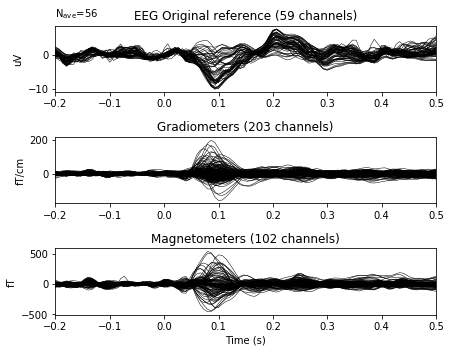

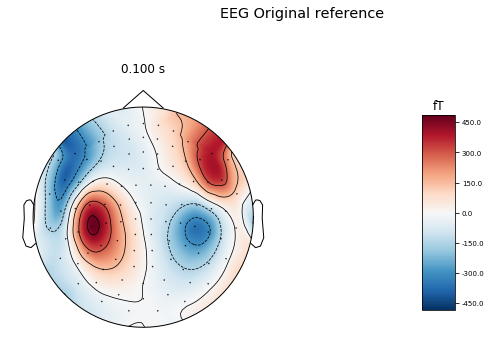

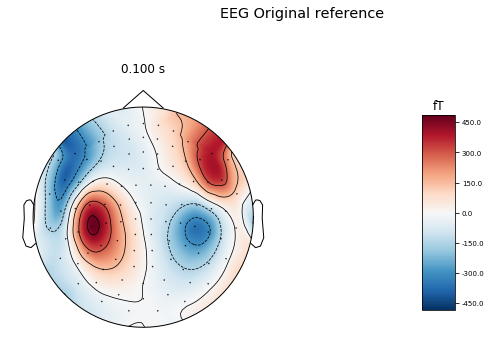

In [10]:
reject = dict(eeg=180e-6, eog=150e-6)
event_id, tmin, tmax = {'left/auditory': 1}, -0.2, 0.5
events = mne.read_events(event_fname)
epochs_params = dict(events=events, event_id=event_id, tmin=tmin, tmax=tmax,
                     reject=reject)

evoked_no_ref = mne.Epochs(raw_no_ref, **epochs_params).average()
del raw_no_ref  # save memory

title = 'EEG Original reference'
evoked_no_ref.plot(titles=dict(eeg=title), time_unit='s')
evoked_no_ref.plot_topomap(times=[0.1], size=3., title=title, time_unit='s')


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
72 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
Created an SSP operator (subspace dimension = 1)
1 projection items activated
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : [

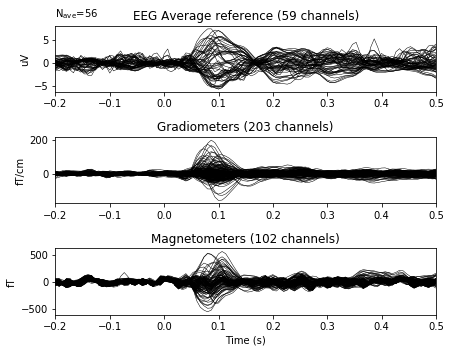

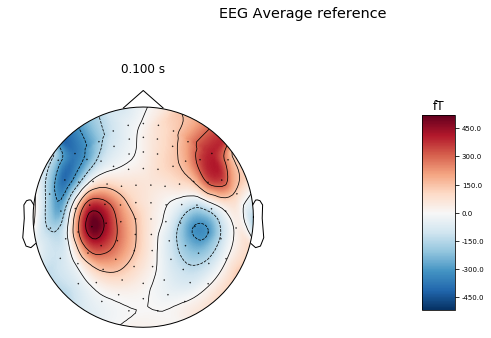

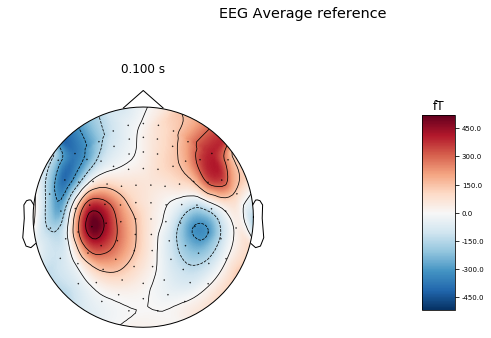

In [11]:
raw.del_proj()
raw_car, _ = mne.set_eeg_reference(raw, 'average', projection=True)
evoked_car = mne.Epochs(raw_car, **epochs_params).average()
del raw_car  # save memory

title = 'EEG Average reference'
evoked_car.plot(titles=dict(eeg=title), time_unit='s')
evoked_car.plot_topomap(times=[0.1], size=3., title=title, time_unit='s')

Applying a custom EEG reference.
Removing existing average EEG reference projection.
72 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']


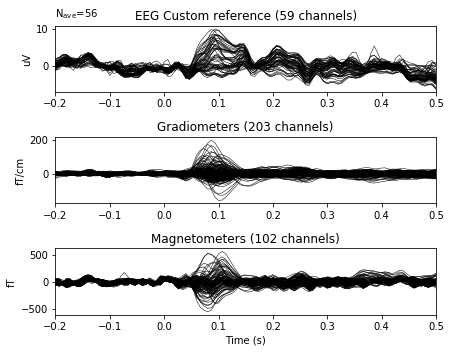

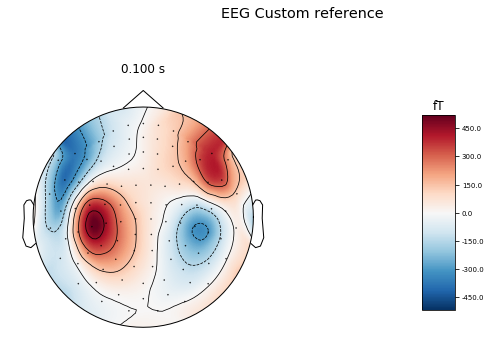

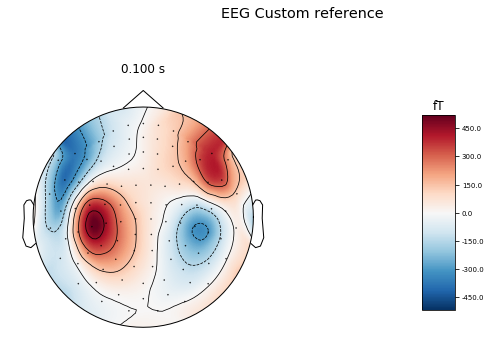

In [12]:
raw_custom, _ = mne.set_eeg_reference(raw, ['EEG 001', 'EEG 002'])
evoked_custom = mne.Epochs(raw_custom, **epochs_params).average()
del raw_custom  # save memory

title = 'EEG Custom reference'
evoked_custom.plot(titles=dict(eeg=title), time_unit='s')
evoked_custom.plot_topomap(times=[0.1], size=3., title=title, time_unit='s')

## Evoked Arithmetics

In [13]:
event_id = {'left/auditory': 1, 'right/auditory': 2,
            'left/visual': 3, 'right/visual': 4}
epochs_params = dict(events=events, event_id=event_id, tmin=tmin, tmax=tmax,
                     reject=reject)
epochs = mne.Epochs(raw, **epochs_params)

print(epochs)

288 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
Created an SSP operator (subspace dimension = 1)
1 projection items activated
<Epochs  |   288 events (good & bad), -0.199795 - 0.499488 sec, baseline [None, 0], ~3.6 MB, data not loaded,
 'left/auditory': 72
 'left/visual': 73
 'right/auditory': 73
 'right/visual': 70>


    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EO

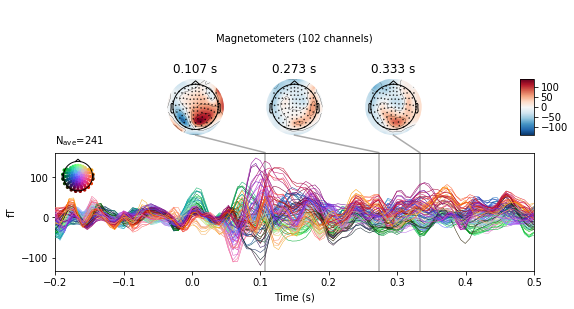

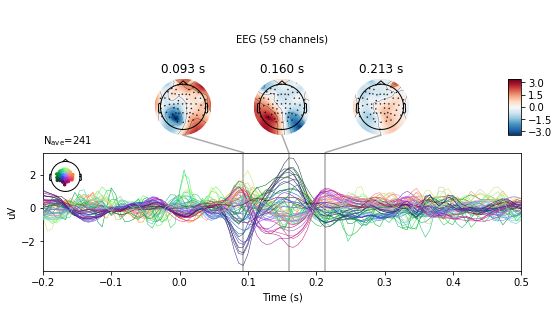

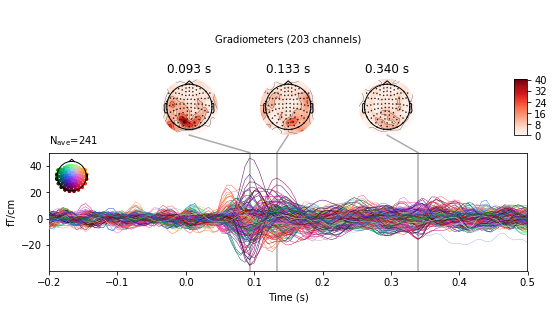

In [14]:
left, right = epochs["left"].average(), epochs["right"].average()

# create and plot difference ERP
joint_kwargs = dict(ts_args=dict(time_unit='s'),
                    topomap_args=dict(time_unit='s'))
mne.combine_evoked([left, -right], weights='equal').plot_joint(**joint_kwargs)

In [15]:
aud_l = epochs["auditory", "left"].average()
aud_r = epochs["auditory", "right"].average()
vis_l = epochs["visual", "left"].average()
vis_r = epochs["visual", "right"].average()

all_evokeds = [aud_l, aud_r, vis_l, vis_r]
print(all_evokeds)

    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EEG : ['EEG 001']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based o

    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EO

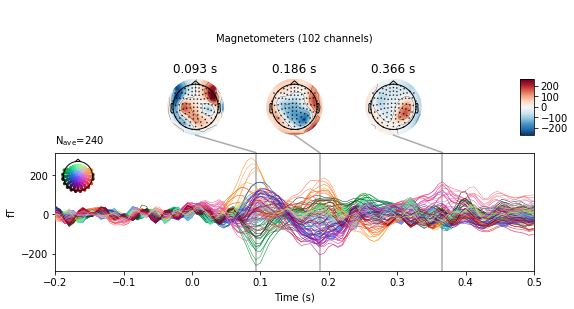

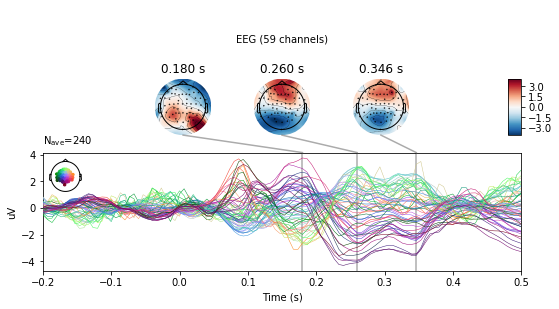

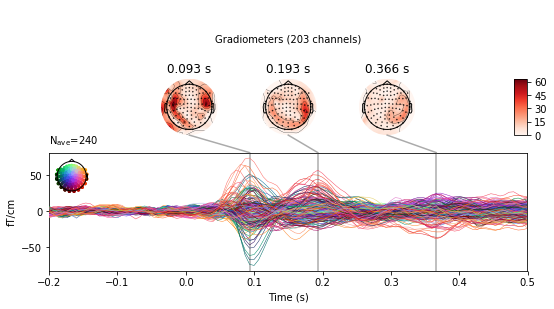

In [16]:
all_evokeds = [epochs[cond].average() for cond in sorted(event_id.keys())]
print(all_evokeds)

# Then, we construct and plot an unweighted average of left vs. right trials
# this way, too:
mne.combine_evoked(
    all_evokeds, weights=(0.25, -0.25, 0.25, -0.25)).plot_joint(**joint_kwargs)

In [17]:
# If they are stored in a list, they can be easily averaged, for example,
# for a grand average across subjects (or conditions).
grand_average = mne.grand_average(all_evokeds)
mne.write_evokeds('/tmp/tmp-ave.fif', all_evokeds)

# If Evokeds objects are stored in a dictionary, they can be retrieved by name.
all_evokeds = dict((cond, epochs[cond].average()) for cond in event_id)
print(all_evokeds['left/auditory'])

# Besides for explicit access, this can be used for example to set titles.
for cond in all_evokeds:
    all_evokeds[cond].plot_joint(title=cond, **joint_kwargs)

UnboundLocalError: local variable 'iprint' referenced before assignment